In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("../data/telecom_customer_churn.csv")

In [11]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
def infotable(dataset):
    info_table = pd.DataFrame({
        "Column": dataset.columns,          
        "Unique": dataset.nunique().values,
        "Missing": dataset.isna().sum().values,
        "Missing %": ((dataset.isna().sum().values/len(dataset))*100).round(2),
        "Data Type": dataset.dtypes.values
    })
    return info_table

print(infotable(df))

              Column  Unique  Missing  Missing % Data Type
0         customerID    7043        0        0.0    object
1             gender       2        0        0.0    object
2      SeniorCitizen       2        0        0.0     int64
3            Partner       2        0        0.0    object
4         Dependents       2        0        0.0    object
5             tenure      73        0        0.0     int64
6       PhoneService       2        0        0.0    object
7      MultipleLines       3        0        0.0    object
8    InternetService       3        0        0.0    object
9     OnlineSecurity       3        0        0.0    object
10      OnlineBackup       3        0        0.0    object
11  DeviceProtection       3        0        0.0    object
12       TechSupport       3        0        0.0    object
13       StreamingTV       3        0        0.0    object
14   StreamingMovies       3        0        0.0    object
15          Contract       3        0        0.0    obje

#### Clealy the data has no missing values

# Columns Description
- "customerID" : ID of the customer, not usually relevant for models/training.
- "gender" : Male or Female
- "SeniorCitizen" : Whether the customer is a senior citizen or not (1, 0)
- "Partner" : Whether the customer has a partner or not (Yes, No)
- "Dependents" : Whether the customer has dependents or not (Yes, No)
- "tenure": Number of months the customer has stayed with the company
- "PhoneService": Whether the customer has a phone service or not (Yes, No)
- "MultipleLines": Whether the customer has multiple lines or not (Yes, No, No phone service)
- "InternetService": Customer’s internet service provider (DSL, Fiber optic, No)
- "OnlineSecureity": Whether the customer has online security or not (Yes, No, No internet service)
- "OnlineBackup": Whether the customer has online backup or not (Yes, No, No internet service)
- "DeviceProtection": Whether the customer has device protection or not (Yes, No, No internet service)
- "TechSupport": Whether the customer has tech support or not (Yes, No, No internet service)
- "StreamingTV": Whether the customer has streaming TV or not (Yes, No, No internet service)
- "SteramingMovies": Whether the customer has streaming movies or not (Yes, No, No internet service)
- "Contract": The contract term of the customer (Month-to-month, One year, Two year)
- "PaperlessBilling": Whether the customer has paperless billing or not (Yes, No)
- "PaymentMethod": The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card
- "MonthlyCharges": The amount charged to the customer monthly
- "TotalCharges": The total amount charged to the customer
- "Churn": Whether the customer churned or not (Yes or No)

## Data Preprocessing

<Axes: xlabel='Churn', ylabel='count'>

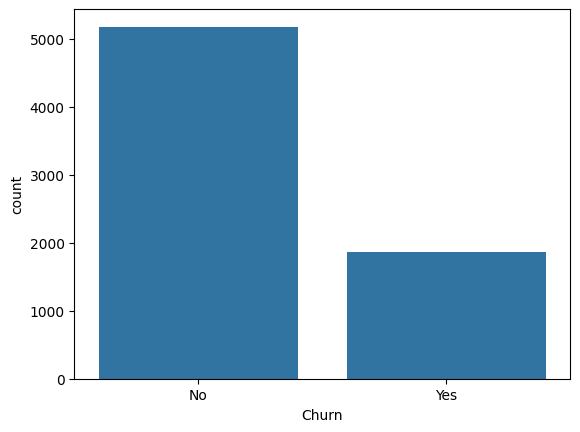

In [14]:
sns.barplot(df['Churn'].value_counts().reset_index(), y = "count", x='Churn')

- The distribution of the data is not equal, there are more NOs than YES. So, while training the data, it is important to keep this in mind and split the data with the help of stratified sampling.

In [15]:
# Checking association
from scipy.stats import chi2_contingency

In [16]:
contingency_table_gender = pd.crosstab(df['gender'], df['Churn'])
chi2, p, dof, expected = chi2_contingency(contingency_table_gender)
print(f"Contingency Table: \n{contingency_table_gender}\n")
print(f"Chi2: {chi2}, p-value: {p}")

Contingency Table: 
Churn     No  Yes
gender           
Female  2549  939
Male    2625  930

Chi2: 0.4840828822091383, p-value: 0.48657873605618596


In [17]:
contingency_table_senior = pd.crosstab(df['SeniorCitizen'], df['Churn'])
chi2, p, dof, expected = chi2_contingency(contingency_table_senior)
print(f"Contingency Table: \n{contingency_table_senior}\n")
print(f"Chi2: {chi2}, p-value: {p}")

Contingency Table: 
Churn            No   Yes
SeniorCitizen            
0              4508  1393
1               666   476

Chi2: 159.42630036838742, p-value: 1.510066805092378e-36


In [18]:
contingency_table_payment = pd.crosstab(df['PaymentMethod'], df['Churn'])
chi2, p, dof, expected = chi2_contingency(contingency_table_payment)
print(f"Contingency Table: \n{contingency_table_payment}\n")
print(f"Chi2: {chi2}, p-value: {p}")

Contingency Table: 
Churn                        No   Yes
PaymentMethod                        
Bank transfer (automatic)  1286   258
Credit card (automatic)    1290   232
Electronic check           1294  1071
Mailed check               1304   308

Chi2: 648.1423274814, p-value: 3.6823546520097993e-140


- High chi2 value and p-value less than 0.05 suggests that there is some association between 2 features. A high chi2 value tells us that there is a huge difference between expected and observed frequencies.

In [19]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
#This is used in case there are empty strings within this column.

In [20]:
df['TotalCharges'].isna().sum()

np.int64(11)

<Axes: xlabel='TotalCharges', ylabel='Count'>

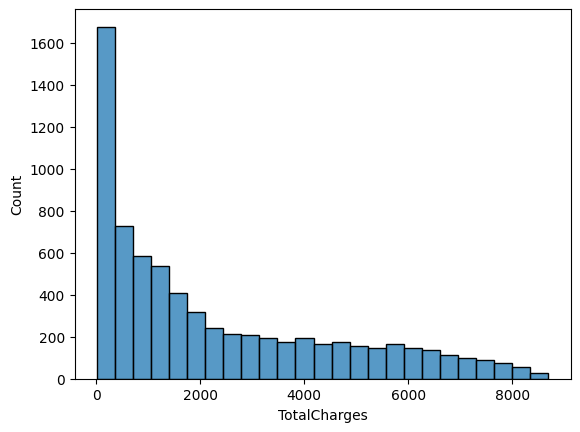

In [21]:
sns.histplot(df['TotalCharges'])


In [22]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [23]:
df.drop(columns=['customerID'], inplace=True)

In [24]:
columns_to_check = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]

internet_no = df['InternetService'] == "No"

# Check if all relevant columns have 'No internet service' where InternetService is 'No'
matches = df[internet_no][columns_to_check].apply(lambda row: all(x == "No internet service" for x in row), axis=1)

# Rows with mismatches
violated_rows = df[internet_no][~matches]

print("Rows with mismatches:")
print(violated_rows)

Rows with mismatches:
Empty DataFrame
Columns: [gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []


In [25]:
df.drop(columns=['InternetService'], inplace=True)

## Data Encoding

In [26]:
from sklearn.preprocessing import LabelEncoder

def encode(df):
    df_preprocessed = df.copy()
    
    label_encoder = LabelEncoder()
    
    one_hot_cols = ['MultipleLines','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
    label_encode_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
    
    for column in list(df_preprocessed.columns):
        if column in one_hot_cols:
            df_preprocessed = pd.get_dummies(df_preprocessed, columns=[column], drop_first=True, dtype=int)
        elif column in label_encode_cols:
            df_preprocessed[column] = label_encoder.fit_transform(df_preprocessed[column])
        else:
            continue
            
    return df_preprocessed

In [27]:
df_encoded = encode(df)
df_encoded.head(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,0,1,0,0,0,0


In [28]:
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [29]:
infotable(df_encoded)

,Column,Unique,Missing,Missing %,Data Type
0,gender,2,0,0.0,int64
1,SeniorCitizen,2,0,0.0,int64
2,Partner,2,0,0.0,int64
3,Dependents,2,0,0.0,int64
4,tenure,73,0,0.0,int64
5,PhoneService,2,0,0.0,int64
6,PaperlessBilling,2,0,0.0,int64
7,MonthlyCharges,1585,0,0.0,float64
8,TotalCharges,6531,0,0.0,float64
9,Churn,2,0,0.0,int64


In [30]:
## Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [31]:
# Separate continuous and categorical columns
continuous_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_cols = [col for col in df_encoded.columns if col not in continuous_cols and col != 'Churn']

# Separate X and y
x_lr = df_encoded.drop('Churn', axis=1)
y_lr = df_encoded['Churn']

# Split into training and testing sets
x_lr_train, x_lr_test, y_lr_train, y_lr_test = train_test_split(x_lr, y_lr, test_size=0.3, random_state=42, stratify=df_encoded['Churn'])

In [32]:
scaler = StandardScaler()

# Fit and transform the continuous columns in the training set
x_lr_train_scaled = scaler.fit_transform(x_lr_train[continuous_cols])

# Transform the continuous columns in the test set
x_lr_test_scaled = scaler.transform(x_lr_test[continuous_cols])

In [33]:
# Replace the continuous columns in the original DataFrame with the scaled values
x_lr_train[continuous_cols] = x_lr_train_scaled
x_lr_test[continuous_cols] = x_lr_test_scaled

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(x_lr_train, y_lr_train)

LogisticRegression()

In [34]:
# Predictions
y_lr_pred = log_reg.predict(x_lr_test)

# Evaluate the model
accuracy = accuracy_score(y_lr_test, y_lr_pred)
conf_matrix = confusion_matrix(y_lr_test, y_lr_pred)
class_report = classification_report(y_lr_test, y_lr_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.8102224325603408
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1552
           1       0.67      0.56      0.61       561

    accuracy                           0.81      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113



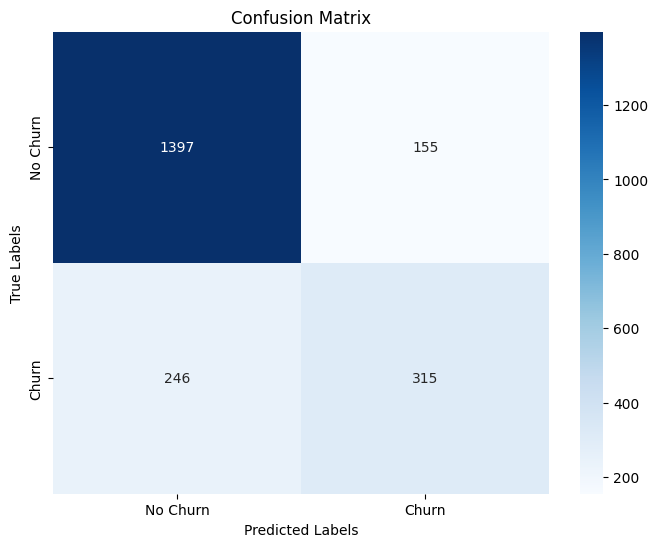

In [35]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [36]:
# Decision tree
# Import libraries
from sklearn.tree import DecisionTreeClassifier

x_dt = df_encoded.drop('Churn', axis=1)
y_dt = df_encoded['Churn']

x_dt_train, x_dt_test, y_dt_train, y_dt_test = train_test_split(x_dt, y_dt, test_size=0.3, stratify=df_encoded['Churn'])

# Initialize and train the model
decision_tree = DecisionTreeClassifier(random_state=42, max_depth=7)
decision_tree.fit(x_dt_train, y_dt_train)

# Make predictions
y_dt_pred = decision_tree.predict(x_dt_test)

In [37]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_dt_test, y_dt_pred))
print("Confusion Matrix:\n", confusion_matrix(y_dt_test, y_dt_pred))
print("Classification Report:\n", classification_report(y_dt_test, y_dt_pred))

Accuracy: 0.7714150496923805
Confusion Matrix:
 [[1328  224]
 [ 259  302]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85      1552
           1       0.57      0.54      0.56       561

    accuracy                           0.77      2113
   macro avg       0.71      0.70      0.70      2113
weighted avg       0.77      0.77      0.77      2113



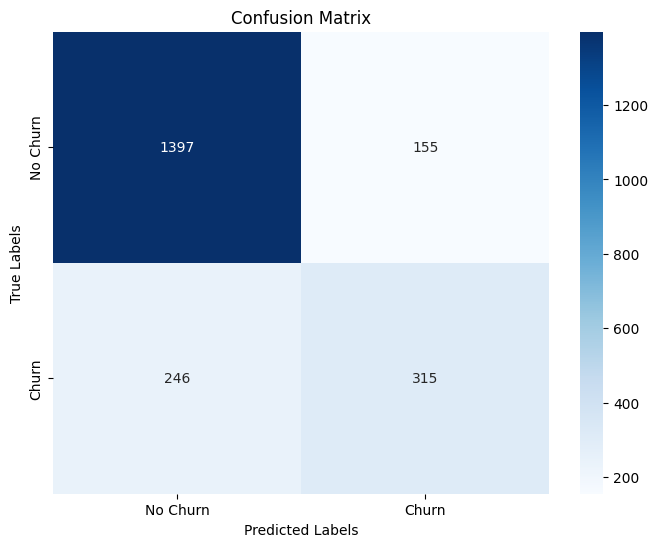

In [38]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [39]:
## Random forest
from sklearn.ensemble import RandomForestClassifier

x_rf = df_encoded.drop(columns=['Churn'], axis=1)
y_rf = df_encoded['Churn']

x_rf_train, x_rf_test, y_rf_train, y_rf_test = train_test_split(x_rf, y_rf, test_size=0.3, random_state=42, stratify=df_encoded['Churn'])

randomforest = RandomForestClassifier(
    n_estimators=100,
    max_depth=7,
    random_state=42, 
    class_weight='balanced' #handles imbalanced datasets by adjusting weights
)

randomforest.fit(x_rf_train, y_rf_train)

y_rf_pred = randomforest.predict(x_rf_test)

In [40]:
y_rf_pred = randomforest.predict(x_rf_test)

# Evaluate the model
accuracy = accuracy_score(y_rf_test, y_rf_pred)
conf_matrix = confusion_matrix(y_rf_test, y_rf_pred)
class_report = classification_report(y_rf_test, y_rf_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.7458589682915286
Confusion Matrix:
[[1124  428]
 [ 109  452]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1552
           1       0.51      0.81      0.63       561

    accuracy                           0.75      2113
   macro avg       0.71      0.76      0.72      2113
weighted avg       0.81      0.75      0.76      2113



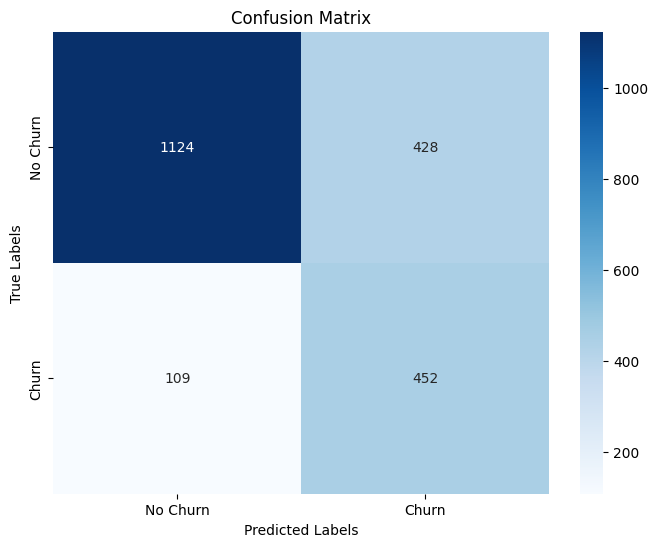

In [41]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()